# Feature-based registration - Rotation, translation, and scale

In [93]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

from imp import reload

import sys
sys.path.append(os.path.join('..', '..'))
from toolbox import transform
reload(transform)

<module 'toolbox.transform' from '/Users/williammarstrand/privat/DTU/Kandidat/1. Semester/Advanced Image Analysis/02506-advanced-image-analysis/exercises/week4/../../toolbox/transform.py'>

In [94]:
n = 1000
P = np.random.rand(2,n)
P

array([[0.02313397, 0.63360772, 0.1003214 , ..., 0.28656928, 0.01281503,
        0.42581143],
       [0.85408136, 0.77306832, 0.54876822, ..., 0.2623896 , 0.28153515,
        0.40307025]])

In [95]:
s = 5
theta = 45
R = np.array([[np.cos(theta), -np.sin(theta)], [np.sin(theta), np.cos(theta)]])
t = np.array([[5, 2]]).T

In [96]:
Q = transform.apply_transformation(P,s,R,t)
Q

array([[1.42705971, 3.37520754, 2.92876111, ..., 4.63636452, 3.83586384,
        4.40357105],
       [4.34176248, 6.72624415, 3.86821925, ..., 3.90840917, 2.7940048 ,
        4.87033058]])

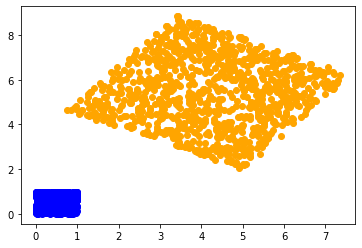

In [97]:
plt.scatter(P[0,:], P[1,:], c='blue')
plt.scatter(Q[0,:], Q[1,:], c='orange')
plt.show()

In [98]:
_s, _R, _t = transform.registration(P, Q)

In [102]:
print(f's total dif: {s-_s}')
print(f'R total dif: {sum(sum(R-_R))}')
print(f't total dif: {sum(sum(t-_t))}')

s dif: 0.27412830952989253
R dif: -3.3306690738754696e-16
t dif: -0.1485858030074958


In [103]:
_Q = transform.apply_transformation(P,_s,_R,_t)

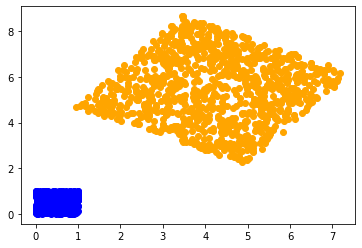

In [104]:
plt.scatter(P[0,:], P[1,:], c='blue')
plt.scatter(_Q[0,:], _Q[1,:], c='orange')
plt.show()

### Adding Noise

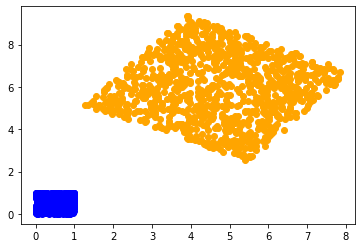

In [106]:
eps = 0.5
noisy_Q = Q + eps
noisy_s, noisy_R, noisy_t = transform.registration(P, noisy_Q)
plt.scatter(P[0,:], P[1,:], c='blue')
plt.scatter(noisy_Q[0,:], noisy_Q[1,:], c='orange')
plt.show()